## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?

**Regression is used to predict a numerical outcome where classification is used to predict a categorical outcome**

2. What is a confusion table? What does it help us understand about a model's performance?

**A confusion table is a matrix that identifies percentages of different types of correct and incorrect predictions (for example false positive and false negative). It helps us to understand not only how accurate a model is, but also in what way it tends to fail, it if overassumes or underassumes the grouping.**

3. What does the SSE quantify about a particular model?

**The SSE about a particular model quantifies the average error distance between the actual point or value and the one predicted by the regression line.**

4. What are overfitting and underfitting?

**Overfitting is when the model is made too specific for the data set that it has high errors when given other data and underfitting is when the model is not specified enough to effectively predict or group.**

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

**Splitting the data into training and testing set improves model performance because the accuracy of the model can legitimately be evaluated with data that it has never seen before. This is especially helpful because typically you don't have multiple data sets to see if the model is accurate before the model is actually put in place.**

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Reporting a class label as a prediction has the strength of being less confusing and establishing clear groupings. However the weakness is that the prediction might only be by less than a percent but that uncertainty is not reflected anywhere in the report. Reporting the probability distribution over class labels contains the strength of being able to show those close decided labels by showing the likihood a data point is in every class. However the potential downside is the increase in showing various percentages per data point means that the actual information is more likely to be confused by whomever is reading the report.**

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

1.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving land_mines.csv to land_mines.csv


In [5]:
mines_data = pd.read_csv('land_mines.csv')

In [6]:
mines_data.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [7]:
mines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [8]:
mines_data.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


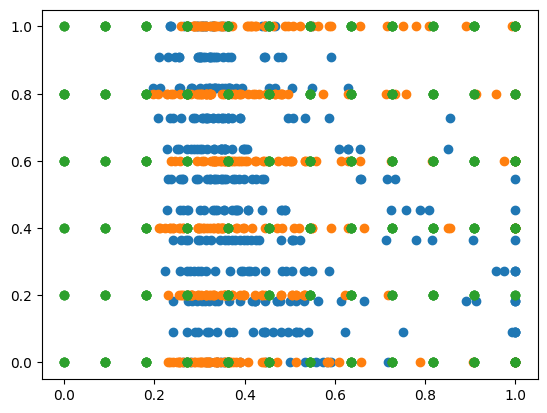

In [14]:
print(plt.scatter(mines_data['voltage'], mines_data['height']))
print(plt.scatter(mines_data['voltage'], mines_data['soil']))
print(plt.scatter(mines_data['height'], mines_data['soil']))

<Axes: xlabel='voltage', ylabel='Density'>

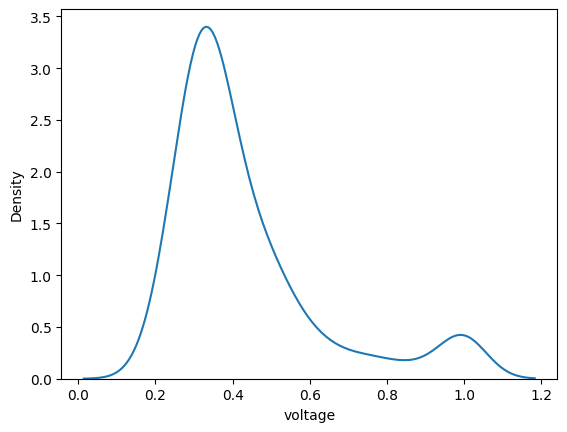

In [16]:
sns.kdeplot(data=mines_data, x='voltage')

<Axes: xlabel='height', ylabel='Density'>

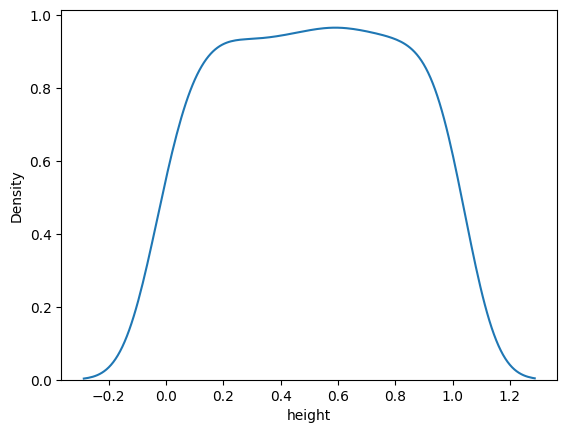

In [17]:
sns.kdeplot(data=mines_data, x='height')

<Axes: xlabel='soil', ylabel='Density'>

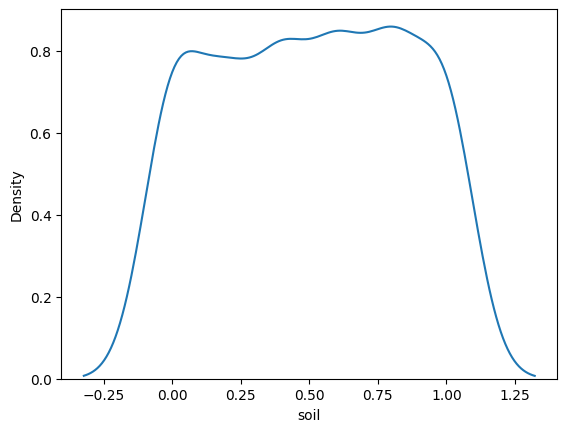

In [18]:
sns.kdeplot(data=mines_data, x='soil')

Only the KDE plot of voltage has what could maybe be outliers but it doesn't look so with the others so I'm not going to drop any of the data.

2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

In [32]:
y = mines_data['mine_type'] #this iw the variable i'm trying to predict
X = mines_data.drop(columns=['mine_type']) #i'm using every other column

def maxmin(z): #defining maxmin to normalize X
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X = X.apply(maxmin) # normalizing X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) #i imported the sklearn thing with all my imports at the beginning.

N_train = len(X_train)
N_test = len(X_test)

3. Build a $k$-NN classifier. Explain how you select $k$ .

In [33]:
k_bar = 10
## Solve for k that maximizes accuracy:
Acc = [] # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc.append( np.sum( y_hat == y_test )/N_test ) # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)


[2]


In [34]:
## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

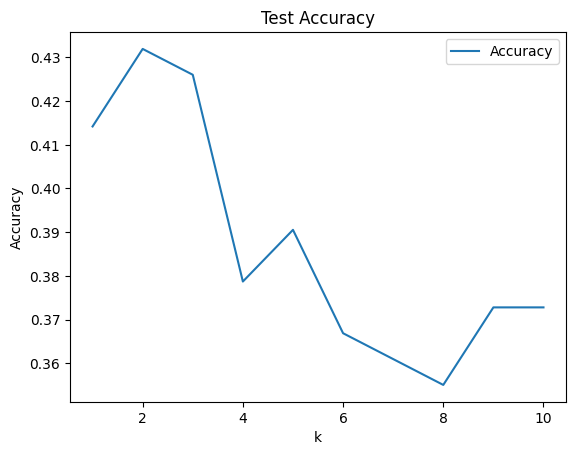

In [35]:
## Accuracy plot:
plt.plot(np.arange(1,k_bar+1),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

Based on the accuracy on the testing data depending on various $k$ values, $k$ should be 2 for the highest accuracy as accuracy steeply drops off when $k$ is greater than 2.

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?

In [36]:
pd.crosstab(y_test, y_hat)

col_0,1,2,3,4,5
mine_type,,,,,
1,19,0,15,2,1
2,0,26,3,4,0
3,8,2,17,2,3
4,10,4,11,8,3
5,6,3,13,6,3


The model seems to be semi-accurate. Overall it is performing best with mine type 2. It seems to be least accurate with mine types 1 and 4.

5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**I would advise someone to use the model to determine what is the lowest potential type of mine that it could be as there seems to pretty commonly be high mine types that are classified as mine type 1. In this case I would stress that the mine type classification cannot be viewed as a tell-all be-all about the safeness of the mine.**

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.